# IMPORTING LIBRARIES

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# DATA LOADING

In [263]:
df = pd.read_csv('Datasets/Spam.csv')

In [267]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN


In [226]:
df.shape

(5572, 7)

Here we have 5572 rows and 7 columns in the dataset.

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   v1          5572 non-null   object 
 1   v2          5572 non-null   object 
 2   Unnamed: 2  50 non-null     object 
 3   Unnamed: 3  12 non-null     object 
 4   Unnamed: 4  6 non-null      object 
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 304.8+ KB


We have 7 columns in total, out of these v1, v2 are necessary. We can drop rest of the columns.

In [228]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
Unnamed: 5    5572
Unnamed: 6    5572
dtype: int64

Unnamed columns contain Null values for all the records. We will drop these columns.

In [229]:
#dropping the columns contains only null values
df = df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)

In [230]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


We will be checking if there is any duplicate value in th dataset

In [231]:
df.duplicated().sum()

409

We will be dropping duplicate values

In [232]:
df = df.drop_duplicates()

df.duplicated().sum()

0

 With the current set of the clean dataset - we have 5163 rows in 2 columns.

In [233]:
df.shape

(5163, 2)

We have columns: v1,v2 of 5136 non-null values of object data type.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5163 non-null   object
 1   v2      5163 non-null   object
dtypes: object(2)
memory usage: 121.0+ KB


# DATA VISUALIZATION

The distribution of Spam and Ham in the dataset

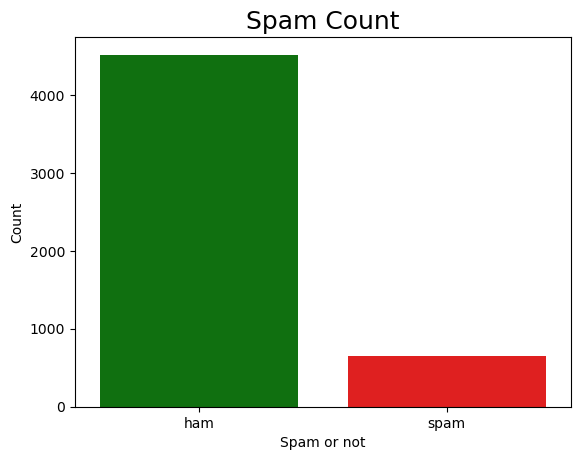

In [235]:
colours = ['green', 'red']
sns.countplot(data = df ,x = 'v1', palette = colours)
plt.xlabel("Spam or not")
plt.ylabel("Count")
plt.title("Spam Count", fontsize=(18))
plt.show()

# TEST and TRAIN DATA SPLITTING

In [236]:
from sklearn.model_selection import train_test_split

X = df['v2']
y = df['v1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Spam Count with Count Vectorization

In [237]:
from sklearn.feature_extraction.text import CountVectorizer

# Feature extraction using Count Vectorization
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(X_train)
x_test_vectorized = vectorizer.transform(X_test)

In [238]:
x_train_vectorized

<4130x7656 sparse matrix of type '<class 'numpy.int64'>'
	with 54317 stored elements in Compressed Sparse Row format>

In [239]:
x_test_vectorized

<1033x7656 sparse matrix of type '<class 'numpy.int64'>'
	with 12361 stored elements in Compressed Sparse Row format>

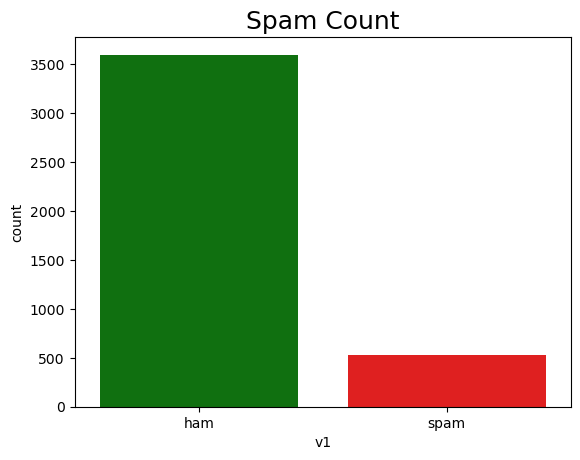

In [240]:
#check balance of target value
sns.countplot(x = y_train, palette= colours)
plt.title("Spam Count", fontsize=(18))
plt.show()


# Spam Count with Random Over Sampler for Balaned Spam Count

In [241]:
#importing library
from imblearn.over_sampling import RandomOverSampler

# defining and fitting data
ros = RandomOverSampler(random_state = 0)
x_train1, y_train1 = ros.fit_resample(x_train_vectorized,y_train)

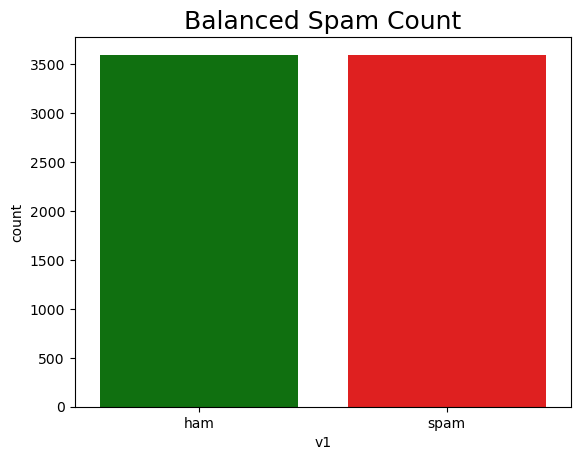

In [242]:
#plotting balanced datset
sns.countplot(x = y_train1, palette= colours)
plt.title("Balanced Spam Count", fontsize= (18))
plt.show()

# Every ML Model will follow the below mentioned steps:

### - Importing necessary library from sklearn
### - Builiding the model
### - Training the model with x_train and y_train dataset
### - Prediction model on y_pred_<model_name> dataset
### - Evaluating the model

# MACHINE LEARNING MODEL - Multinomial Naive Bayes Classifier

In [243]:
from sklearn.naive_bayes import MultinomialNB
# Build and train the model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train1, y_train1)

MultinomialNB()

In [244]:
# Predict on test data
y_pred_nb = naive_bayes_model.predict(x_test_vectorized)

In [245]:
# Evaluate the model
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_nb)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_nb)}')
print(f'Accuracy Score: {accuracy_score(y_pred_nb,y_test)}')

Confusion Matrix:
 [[897  20]
 [ 14 102]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       917
        spam       0.84      0.88      0.86       116

    accuracy                           0.97      1033
   macro avg       0.91      0.93      0.92      1033
weighted avg       0.97      0.97      0.97      1033

Accuracy Score: 0.9670861568247822


# MACHINE LEARNING MODEL - Logistic Regression Classifier	

In [246]:
from sklearn.linear_model import LogisticRegression
# Build and train the model
lr_model = LogisticRegression()
lr_model.fit(x_train1, y_train1)

LogisticRegression()

In [247]:
# Predict on test data
y_pred_lr = lr_model.predict(x_test_vectorized)

In [248]:
# Evaluate the model
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_lr)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_lr)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_lr)}')

Confusion Matrix:
 [[913   4]
 [ 13 103]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       917
        spam       0.96      0.89      0.92       116

    accuracy                           0.98      1033
   macro avg       0.97      0.94      0.96      1033
weighted avg       0.98      0.98      0.98      1033

Accuracy Score: 0.9835430784123911


# MACHINE LEARNING MODEL - Support Vector Classifier (SVC)

In [249]:
from sklearn.svm import SVC
# Build and train the model
svc_model = SVC()
svc_model.fit(x_train1, y_train1)

SVC()

In [250]:
# Predict on test data
y_pred_svc = svc_model.predict(x_test_vectorized)

In [251]:
# Evaluate the model
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svc)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_svc)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_svc)}')

Confusion Matrix:
 [[916   1]
 [ 18  98]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       917
        spam       0.99      0.84      0.91       116

    accuracy                           0.98      1033
   macro avg       0.99      0.92      0.95      1033
weighted avg       0.98      0.98      0.98      1033

Accuracy Score: 0.9816069699903195


# MACHINE LEARNING MODEL - Random Forest Classifier	

In [252]:
from sklearn.ensemble import RandomForestClassifier
# Build and train the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train1, y_train1)

RandomForestClassifier()

In [253]:
# Predict on test data
y_pred_rf = rf_model.predict(x_test_vectorized)

In [254]:
# Evaluate the model
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_rf)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf)}')

Confusion Matrix:
 [[915   2]
 [ 25  91]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       917
        spam       0.98      0.78      0.87       116

    accuracy                           0.97      1033
   macro avg       0.98      0.89      0.93      1033
weighted avg       0.97      0.97      0.97      1033

Accuracy Score: 0.9738625363020329


# Comparing the accuracy of each Machine Learning Models

In [255]:
#makig lists of model names and accuracy scores
model_names = ['Multinomial Naive Bayes Classifier', 'Logistic Regression Classifier', 'Support Vector Classifier',
              'Random Forest Classifier']
accuracy_scores = [accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_svc),
                  accuracy_score(y_test,y_pred_rf)]

#storing result into dataframe
result = pd.DataFrame({'Model': model_names,
                      'Accuracy': accuracy_scores})

#View Result
result

,Model,Accuracy
0,Multinomial Naive Bayes Classifier,0.967086
1,Logistic Regression Classifier,0.983543
2,Support Vector Classifier,0.981607
3,Random Forest Classifier,0.973863


# Understanding the model accuracy using Horizontal Bar Plot

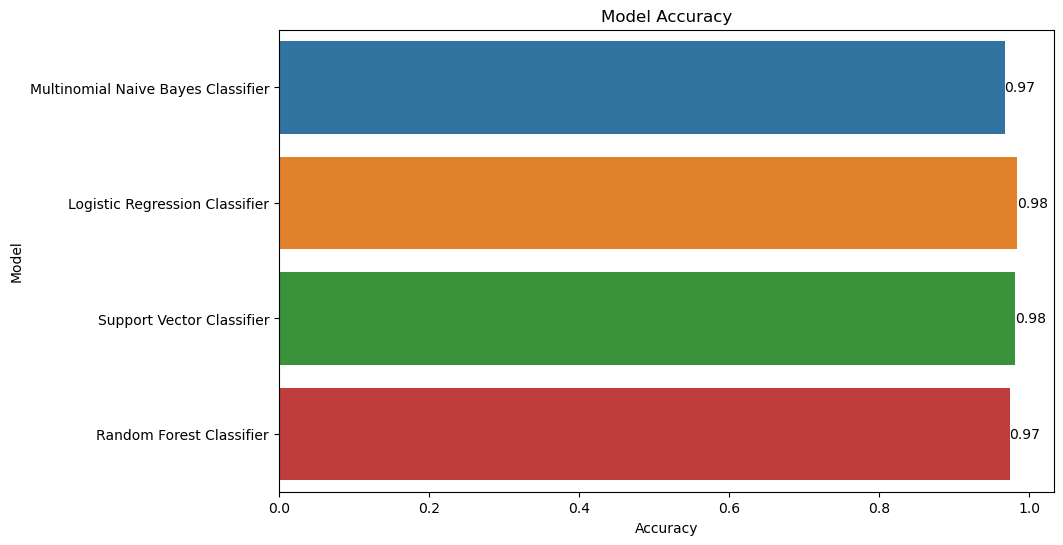

In [256]:
# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=result, orient='h')

# Add data labels
for index, value in enumerate(result['Accuracy']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy')

# Show the plot
plt.show()

# Testing the model against real model spam/non-spam email body

In [257]:
#Defining a function to check the mail is spam or not
def checkingSpam(message):
    transform_message = vectorizer.transform(message)
    prediction = lr_model.predict(transform_message)
    if prediction[0]== 'spam':
        print("This is a Spam Mail")
    else:
        print("This mail is non-Spam")

In [258]:
sample1 = ["Congratulations! You've won a free ₹1,00,00,000 (1 Crore) lottery. Click the link to claim your reward now!"]

In [259]:
checkingSpam(sample1)

This is a Spam Mail


In [260]:
sample2 = ['''Hi all,

I hope this email finds you well.
We're planning a team meeting next week to discuss our next year goal.
Let's connect tonight at 06:00 PM IST.

Best regards,
Team Manager''']

In [261]:
#checking Result
checkingSpam(sample2)

This mail is non-Spam
